<a href="https://colab.research.google.com/github/bradykuo/clustering-and-classifying-the-wine-dataset/blob/main/wine_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

In [4]:
# Load the winequality dataset
url = 'winequality.csv'
df = pd.read_csv(url)

df.head(10)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 31


In [ ]:
# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values)

# Set the title and axis labels
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy scores for each fold:
 [0.58076923 0.57384615 0.58891455 0.56889915 0.54965358]

Logistic Regression Mean accuracy score: 0.5724165334280807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.53384615 0.51461538 0.54811393 0.51501155 0.52270978]

QDA Mean accuracy score: 0.5268593592704447


In [ ]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.58       0.55615385 0.59969207 0.56428022 0.5704388 ]

LDA Mean accuracy score: 0.5741129863208385


In [ ]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.50230769 0.52923077 0.52809854 0.5134719  0.5134719 ]

KNN Mean accuracy score: 0.5173161603600402


In [ ]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.72       0.72076923 0.74903772 0.72671286 0.70361817]

Random Forest Mean accuracy score: 0.7240275951915676


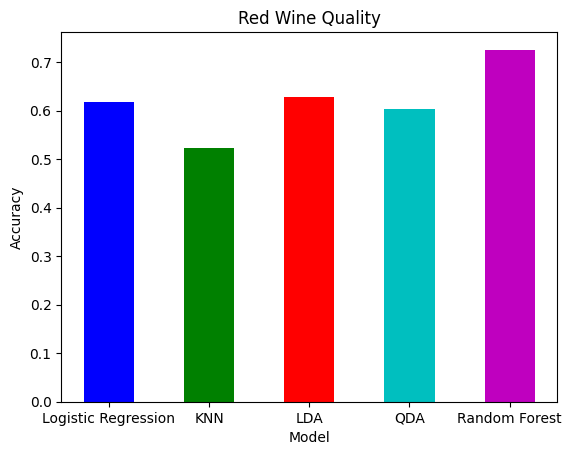

In [ ]:
# 設定 x 軸的標籤
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# 設定 y 軸的數值
values = [0.6179447492163008, 0.5234541536050157, 0.6285638714733544, 0.6022805642633229, 0.7254760971786833]

# 設定長條圖的顏色和條寬
colors = ['b', 'g', 'r', 'c', 'm']
width = 0.5

# 繪製長條圖
plt.bar(labels, values, width=width, color=colors)

# 設定圖表標題和 x 軸、y 軸的標籤
plt.title('Red Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# 顯示圖表
plt.show()

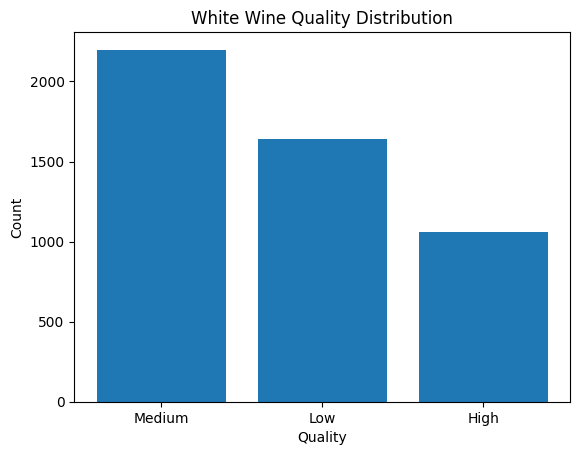

In [ ]:
# Load the winequality dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/分類紅白酒/winequality-white.csv')

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values)

# Set the title and axis labels
plt.title('White Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Accuracy scores for each fold:
 [0.54285714 0.57653061 0.55714286 0.59244127 0.57303371]

Logistic Regression Mean accuracy score: 0.5684011173417273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.53061224 0.50918367 0.53367347 0.5485189  0.52400409]

QDA Mean accuracy score: 0.5291984740780888


In [ ]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.56428571 0.57142857 0.56020408 0.60163432 0.57814096]

LDA Mean accuracy score: 0.575138729649163


In [ ]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.52244898 0.5255102  0.49897959 0.50970378 0.49744637]

KNN Mean accuracy score: 0.5108177857455545


In [ ]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.73571429 0.7255102  0.72346939 0.74463739 0.70480082]

Random Forest Mean accuracy score: 0.7268264159596424


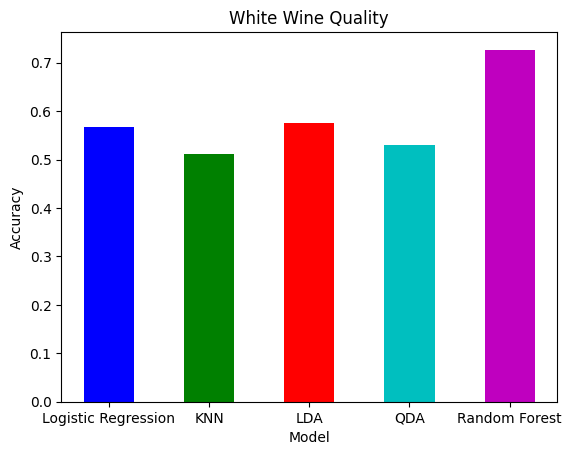

In [ ]:
# 設定 x 軸的標籤
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# 設定 y 軸的數值
values = [0.5677888724437681, 0.5108177857455545, 0.575138729649163, 0.5291984740780888, 0.7268264159596424]

# 設定長條圖的顏色和條寬
colors = ['b', 'g', 'r', 'c', 'm']
width = 0.5

# 繪製長條圖
plt.bar(labels, values, width=width, color=colors)

# 設定圖表標題和 x 軸、y 軸的標籤
plt.title('White Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# 顯示圖表
plt.show()

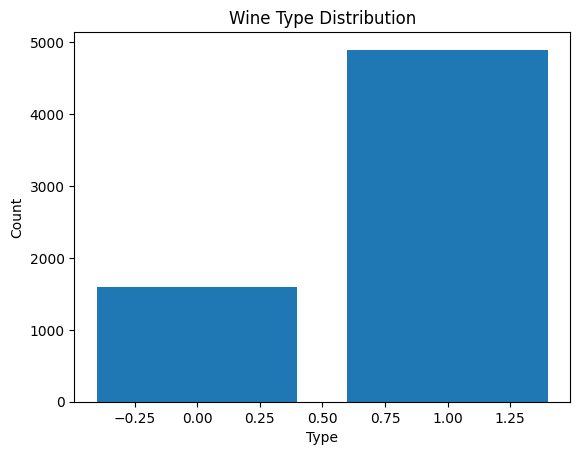

In [ ]:
# Load the winequality dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/分類紅白酒/winequality.csv')

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
type_mapping = { 'red' : 0,'white' : 1}
y =  df['type'].map(type_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values)

# Set the title and axis labels
plt.title('Wine Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nMean accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Accuracy scores for each fold:
 [0.97461538 0.98615385 0.97690531 0.98691301 0.9830639 ]

Mean accuracy score: 0.9815302895718601


In [ ]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nMean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.98538462 0.98769231 0.9830639  0.98460354 0.98537336]

Mean accuracy score: 0.9852235447385563


In [ ]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nMean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.99384615 0.99615385 0.99461124 0.99615089 0.99230177]

Mean accuracy score: 0.9946127790608159


In [ ]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nMean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.93615385 0.94153846 0.93148576 0.95150115 0.94842186]

Mean accuracy score: 0.9418202167347663


In [ ]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)

# Calculate and print the mean accuracy score across all folds
print("\nMean accuracy score:", scores.mean())

Accuracy scores for each fold:
 [0.99692308 0.99384615 0.99538106 0.99692071 0.99384142]

Mean accuracy score: 0.995382483567241


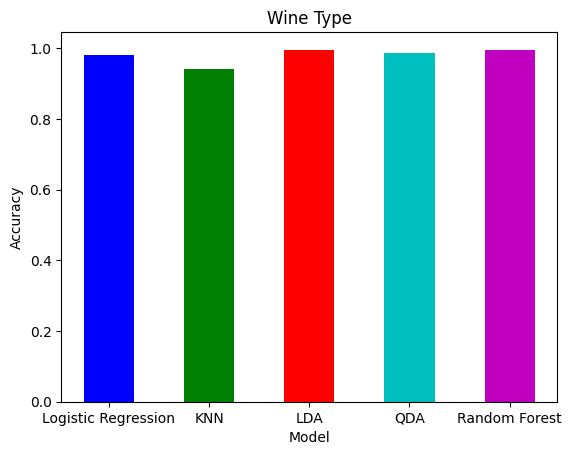

In [ ]:
# 設定 x 軸的標籤
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# 設定 y 軸的數值
values = [0.9813763249837153, 0.9418202167347663, 0.9946127790608159, 0.9852235447385563, 0.995382483567241]

# 設定長條圖的顏色和條寬
colors = ['b', 'g', 'r', 'c', 'm']
width = 0.5

# 繪製長條圖
plt.bar(labels, values, width=width, color=colors)

# 設定圖表標題和 x 軸、y 軸的標籤
plt.title('Wine Type')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# 顯示圖表
plt.show()